In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [2]:
df = pd.read_csv('kbase_reaction_per_model.csv')

In [3]:
import os
modelseed_dpath = os.path.join('..', '..', 'ModelSEEDDatabase', 'Biochemistry',  'Pathways')
os.listdir(modelseed_dpath)

['HopeScenarios.txt',
 'KEGG.pathways',
 'ModelSEED_Subsystems.tsv',
 'plantdefault.pathways.tsv']

In [4]:
modelseed_pathway_df = pd.read_csv(os.path.join(modelseed_dpath, 'ModelSEED_Subsystems.tsv',), sep='\t')

In [5]:
modelseed_pathway_df

,Class,Sub-class,Name,Role,Reaction
0,-,-,CBSS-155864.1.peg.3753,Glutamate synthase [NADPH] small chain (EC 1.4...,rxn00085
1,-,-,COG0523,Carbonic anhydrase (EC 4.2.1.1),rxn00102
2,-,-,COG0523,Dihydroorotase (EC 3.5.2.3),rxn01465
3,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00299
4,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00302
...,...,...,...,...,...
9815,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,DNA gyrase subunit B (EC 5.99.1.3),rxn13783
9816,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit A (EC 5.99.1.-),rxn13783
9817,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit B (EC 5.99.1.-),rxn13783
9818,Virulence,"Type III, Type IV, Type VI, ESAT secretion sys...",Type_IV_pilus,3-dehydroquinate synthase (EC 4.2.3.4),rxn02212


In [6]:
df.id.str.rsplit('_', n=1, expand=True)

,0,1
0,EX_cpd11416,b
1,EX_cpd00001,b
2,EX_cpd00254,b
3,EX_cpd10516,b
4,EX_cpd00007,b
...,...,...
12997,rxn08619,c0
12998,rxn05596,c0
12999,EX_cpd00063,e0
13000,EX_cpd00058,e0


In [7]:
df['Reaction'] = df.id.str.rsplit('_', n=1, expand=True)[0]

In [8]:
df.head()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd11416_b,EX_cpd11416_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd11416
1,1,EX_cpd00001_b,EX_cpd00001_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001
2,2,EX_cpd00254_b,EX_cpd00254_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00254
3,3,EX_cpd10516_b,EX_cpd10516_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd10516
4,4,EX_cpd00007_b,EX_cpd00007_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00007


In [9]:
modelseed_pathway_in_model_df = modelseed_pathway_df.loc[modelseed_pathway_df.Reaction.isin(df.Reaction)]

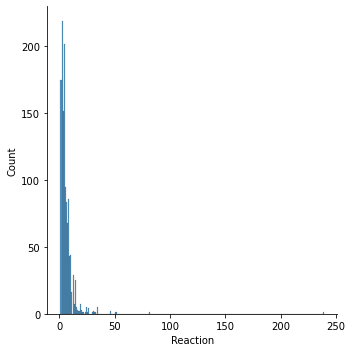

In [10]:
sns.displot(modelseed_pathway_in_model_df.Reaction.value_counts())
plt.show()

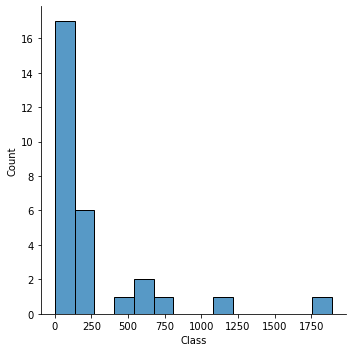

In [11]:
sns.displot(modelseed_pathway_in_model_df.Class.value_counts())
plt.show()

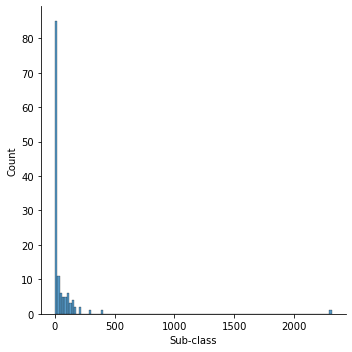

In [12]:
sns.displot(modelseed_pathway_in_model_df['Sub-class'].value_counts())
plt.show()

In [13]:
modelseed_pathway_in_model_df[['Class', 'Sub-class']].value_counts().reset_index().head(30)



,Class,Sub-class,0
0,Experimental Subsystems,-,1551
1,Carbohydrates,Central carbohydrate metabolism,372
2,Amino Acids and Derivatives,Branched-chain amino acids,288
3,"Fatty Acids, Lipids, and Isoprenoids",Fatty acids,216
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",Folate and pterines,215
5,"Fatty Acids, Lipids, and Isoprenoids",Phospholipids,181
6,Clustering-based subsystems,-,171
7,Experimental Subsystems,Plant-Prokaryote DOE project,169
8,Clustering-based subsystems,Fatty acid metabolic cluster,154
9,Stress Response,Oxidative stress,148


In [14]:
modelseed_pathway_in_model_df['Class'].value_counts()# .reset_index()['index'].to_list()



Experimental Subsystems                             1889
Carbohydrates                                       1080
Amino Acids and Derivatives                          793
Fatty Acids, Lipids, and Isoprenoids                 649
Clustering-based subsystems                          549
Cofactors, Vitamins, Prosthetic Groups, Pigments     465
Nucleosides and Nucleotides                          247
Cell Wall and Capsule                                239
Protein Metabolism                                   233
Membrane Transport                                   217
Respiration                                          210
Stress Response                                      190
Metabolism of Aromatic Compounds                      90
Virulence                                             79
Regulation and Cell signaling                         66
RNA Metabolism                                        62
Nitrogen Metabolism                                   56
Sulfur Metabolism              

In [15]:
modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df.Class.isin(['Clustering-based subsystems']), 'Sub-class'].value_counts()

-                                                                                                          171
Fatty acid metabolic cluster                                                                               154
Hypothetical lipase related to Phosphatidate metabolism                                                     26
relates permeases with chi component of DNA pol and Val tRNA syn                                            20
Clustering-based subsystems                                                                                 19
contains Thr-tRNA-syn, pyridoxine biosyn, lipid A biosyn, 3 hypos                                           14
Related to N-acetylglucosamine utilization subsystem?                                                       14
Mycocerosic acid and related Polyketides biosynthesis clusters                                              13
Two related proteases                                                                                       13
C

In [16]:
reaction_classes = [
 'Carbohydrates',
 'Amino Acids and Derivatives',
 'Fatty Acids, Lipids, and Isoprenoids',
 #'Clustering-based subsystems',
 'Cofactors, Vitamins, Prosthetic Groups, Pigments',
 'Nucleosides and Nucleotides',
 'Cell Wall and Capsule',
 'Protein Metabolism',
 'Membrane Transport',
 'Respiration',
 'Stress Response',
 'Metabolism of Aromatic Compounds',
 'Virulence',
 'Regulation and Cell signaling',
 'RNA Metabolism',
 'Nitrogen Metabolism',
 'Sulfur Metabolism',
 'Phosphorus Metabolism',
 'Miscellaneous',
 'DNA Metabolism',
 'Motility and Chemotaxis',
 'Secondary Metabolism',
]

In [17]:
classes_for_merge = modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df['Class'].isin(reaction_classes), ['Class', 'Reaction']].drop_duplicates()

In [18]:
classes_for_merge

,Class,Reaction
40,Amino Acids and Derivatives,rxn00717
41,Amino Acids and Derivatives,rxn01025
44,Amino Acids and Derivatives,rxn00283
47,Amino Acids and Derivatives,rxn00806
48,Amino Acids and Derivatives,rxn00903
...,...,...
9789,Virulence,rxn10481
9803,Virulence,rxn02011
9804,Virulence,rxn08040
9818,Virulence,rxn02212


In [19]:
classes_for_merge['foo'] = 1
pdf = classes_for_merge.pivot_table(columns='Class', index='Reaction', aggfunc='count', fill_value=0, values='foo')
pdf['All'] = pdf.sum(axis=1)
pdf.loc[pdf.All > 4, ].sum().nlargest(n=10)

Class
All                                                 114
Amino Acids and Derivatives                          21
Fatty Acids, Lipids, and Isoprenoids                 20
Metabolism of Aromatic Compounds                     20
Carbohydrates                                        18
Cofactors, Vitamins, Prosthetic Groups, Pigments     11
Miscellaneous                                        11
Virulence                                             4
Protein Metabolism                                    3
RNA Metabolism                                        3
dtype: int64

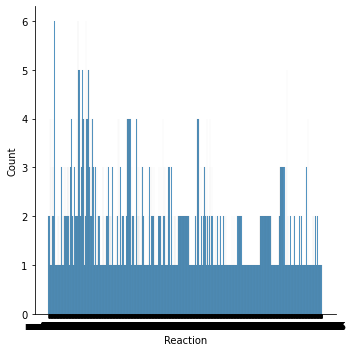

In [20]:
sns.displot(data=classes_for_merge, x='Reaction')
plt.show()

In [21]:
df

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd11416_b,EX_cpd11416_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd11416
1,1,EX_cpd00001_b,EX_cpd00001_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001
2,2,EX_cpd00254_b,EX_cpd00254_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00254
3,3,EX_cpd10516_b,EX_cpd10516_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd10516
4,4,EX_cpd00007_b,EX_cpd00007_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00007
...,...,...,...,...,...,...,...,...,...,...,...
12997,12997,rxn08619_c0,glucosyltransferase_II_LPS_core_synthesis_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08619
12998,12998,rxn05596_c0,TRANS_RXNBWI_115525cemaizeexpK_plus__c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn05596
12999,12999,EX_cpd00063_e0,EX_Ca2_plus__e0,Union,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063
13000,13000,EX_cpd00058_e0,EX_Cu2_plus__e0,Union,gapfill,NaN,False,True,NaN,NaN,EX_cpd00058


In [22]:
class_df = pd.merge(df, classes_for_merge, on='Reaction', how='left')

In [23]:
class_df.tail()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,Class,foo
17249,12997,rxn08619_c0,glucosyltransferase_II_LPS_core_synthesis_c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn08619,Cell Wall and Capsule,1.0
17250,12998,rxn05596_c0,TRANS_RXNBWI_115525cemaizeexpK_plus__c0,Union,gapfill,NaN,False,True,NaN,Unknown,rxn05596,Membrane Transport,1.0
17251,12999,EX_cpd00063_e0,EX_Ca2_plus__e0,Union,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063,NaN,NaN
17252,13000,EX_cpd00058_e0,EX_Cu2_plus__e0,Union,gapfill,NaN,False,True,NaN,NaN,EX_cpd00058,NaN,NaN
17253,13001,EX_cpd00205_e0,EX_K_plus__e0,Union,gapfill,NaN,False,True,NaN,NaN,EX_cpd00205,NaN,NaN


In [24]:
tot_class_pdf = class_df.pivot_table(index=['model', 'Class'], columns='status', values='Reaction', aggfunc='count', fill_value=0).reset_index()


In [25]:
tot_class_pdf['Genes Annot.'] = tot_class_pdf.hasgpr
tot_class_pdf['No Genes'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr
tot_class_pdf['Gapfill Rxn'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr + tot_class_pdf['gapfill']


In [26]:
sns.color_palette(n_colors=3)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

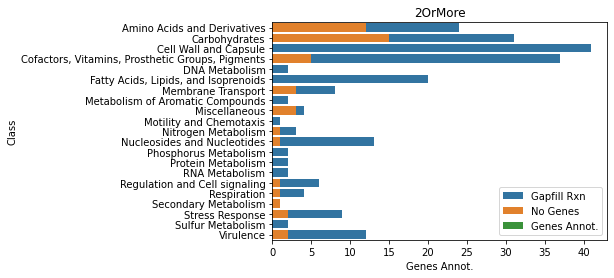

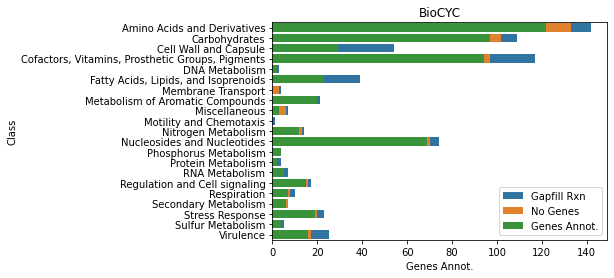

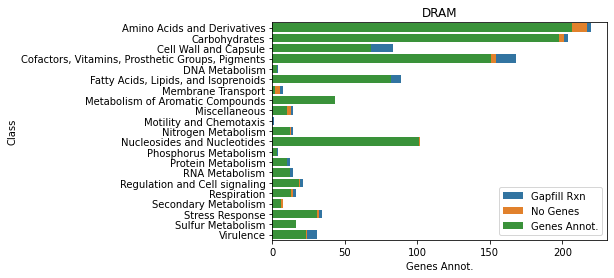

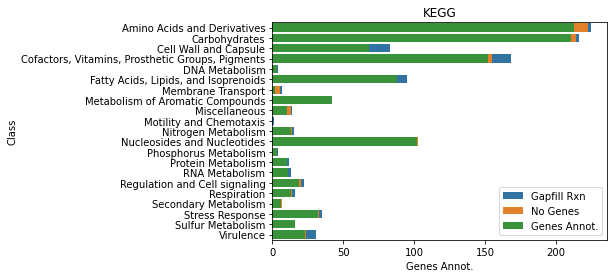

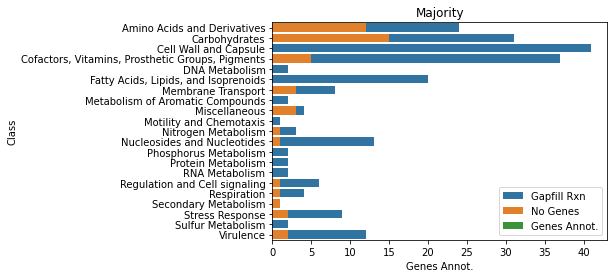

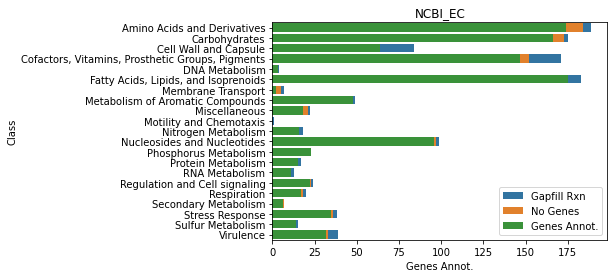

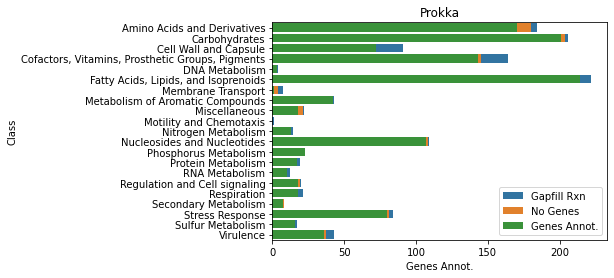

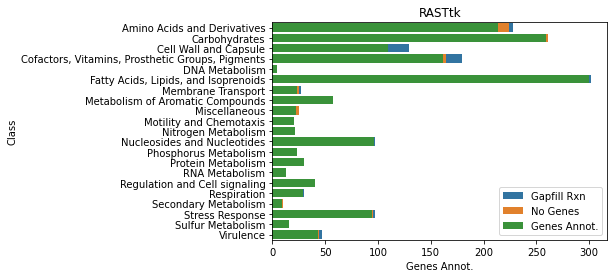

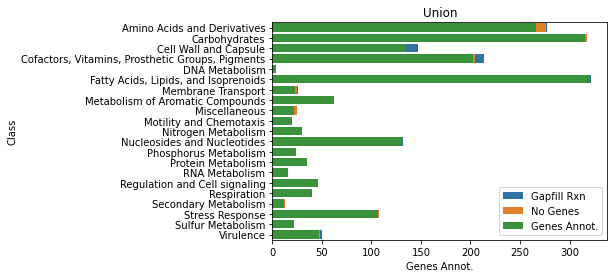

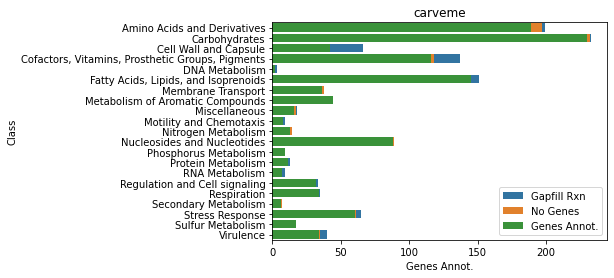

In [27]:
tot_class_pdf
for m in tot_class_pdf.model.unique():
    for l,c in zip(['Gapfill Rxn', 'No Genes', 'Genes Annot.'], sns.color_palette(n_colors=3)):
        sns.barplot(data=tot_class_pdf.loc[tot_class_pdf.model.isin([m])], 
                    y='Class', x=l, color=c, label=l)
    plt.legend()
    plt.title(m)
    plt.show()
    

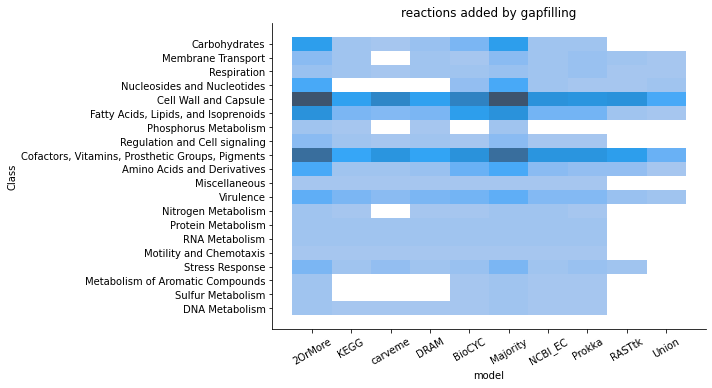

In [30]:
sns.displot(data=class_df.loc[class_df.status.isin(['gapfill'])], x='model', y='Class', kind='hist', aspect=2, legend=True)
plt.xticks(rotation=30)
plt.title('reactions added by gapfilling')
plt.show()

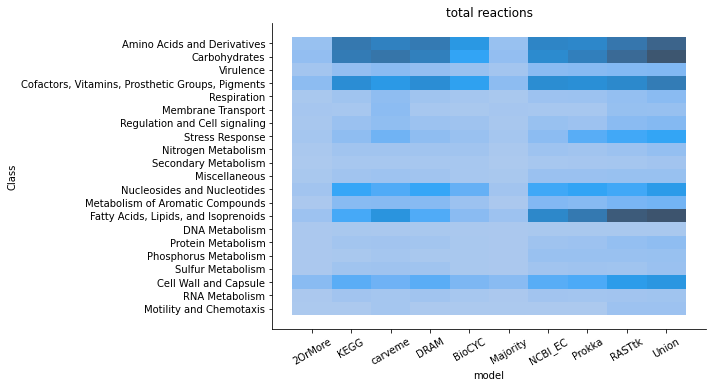

In [31]:
sns.displot(data=class_df.loc[~class_df.Class.isna()], x='model', y='Class', kind='hist', aspect=2)
plt.xticks(rotation=30)
plt.title('total reactions')
plt.show()

In [32]:
class_df.status.value_counts()

hasgpr              13845
nogpr                1342
gapfill              1265
exchange              655
exchange_gapfill      147
Name: status, dtype: int64

In [33]:
class_df.status.unique()

array(['exchange', 'nogpr', 'hasgpr', 'exchange_gapfill', 'gapfill'],
      dtype=object)

In [34]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
df['status_int'] = df.status.map(status_map)
pdf = df.pivot_table(index='Reaction', columns='model', values='status_int', fill_value=0)

In [35]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 3, 'gapfill': 1}
class_df['status_int'] = class_df.status.map(status_map)
pdf = class_df.dropna(subset='Class').pivot_table(index='Reaction', columns='model', values='status_int', fill_value=-10)

In [36]:
class_df.Class.value_counts()

Carbohydrates                                       1784
Amino Acids and Derivatives                         1712
Fatty Acids, Lipids, and Isoprenoids                1443
Cofactors, Vitamins, Prosthetic Groups, Pigments    1393
Nucleosides and Nucleotides                          831
Cell Wall and Capsule                                819
Stress Response                                      502
Metabolism of Aromatic Compounds                     365
Virulence                                            330
Regulation and Cell signaling                        235
Respiration                                          196
Miscellaneous                                        155
Nitrogen Metabolism                                  146
Protein Metabolism                                   146
Membrane Transport                                   139
Sulfur Metabolism                                    128
Phosphorus Metabolism                                118
RNA Metabolism                 

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


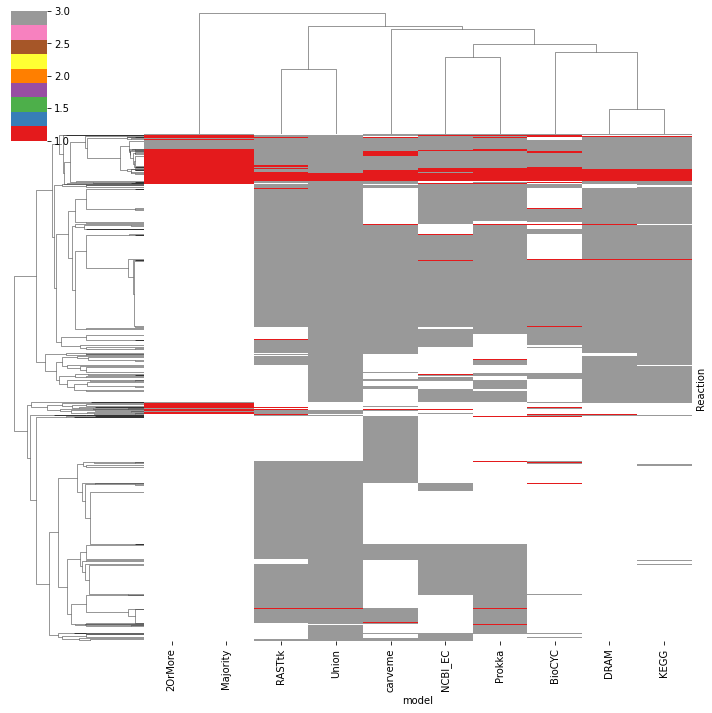

In [37]:

#lut = dict(zip(class_df.Class.unique(), "rbg"))
#samples = np.repeat(list(string.ascii_letters[0:8]),20)[:150]
#sample_cols = dict(zip(set(samples), sns.color_palette("cubehelix", 8)))

# row_colors = pd.DataFrame({'species':species.map(lut),
#                           'sample':[sample_cols[i] for i in samples]})
# g = sns.clustermap(iris, row_colors=row_colors,row_cluster=False)

sns.clustermap(pdf, cmap='Set1', mask=(pdf == -10), yticklabels=False)


plt.show()

In [38]:
df.loc[df.Reaction == 'EX_cpd00001']

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,status_int
1,1,EX_cpd00001_b,EX_cpd00001_b,2OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
115,115,EX_cpd00001_e0,EX_H2O_e0,2OrMore,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
161,161,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
1259,1259,EX_cpd00001_e0,EX_H2O_e0,KEGG,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
1331,1331,EX_cpd00001_b,EX_cpd00001_b,carveme,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
2519,2519,EX_cpd00001_e0,EX_H2O_e0,carveme,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
2636,2636,EX_cpd00001_b,EX_cpd00001_b,DRAM,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
3704,3704,EX_cpd00001_e0,EX_H2O_e0,DRAM,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
3754,3754,EX_cpd00001_b,EX_cpd00001_b,BioCYC,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
4379,4379,EX_cpd00001_e0,EX_H2O_e0,BioCYC,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4


In [39]:
total_models_per_reaction = class_df.dropna(subset='Class').groupby(['Class', 'Reaction']).model.nunique().reset_index()
gapfill_models_per_reaction = class_df.loc[
    class_df.status.isin(['gapfill']) & ~class_df.Class.isna()].groupby(['Class', 'Reaction']).model.nunique().reset_index()
total_models_per_reaction['stat'] = 'total'
gapfill_models_per_reaction['stat'] = 'gapfill'
total_models_per_reaction = pd.concat(
    [total_models_per_reaction,
    gapfill_models_per_reaction]).reset_index()


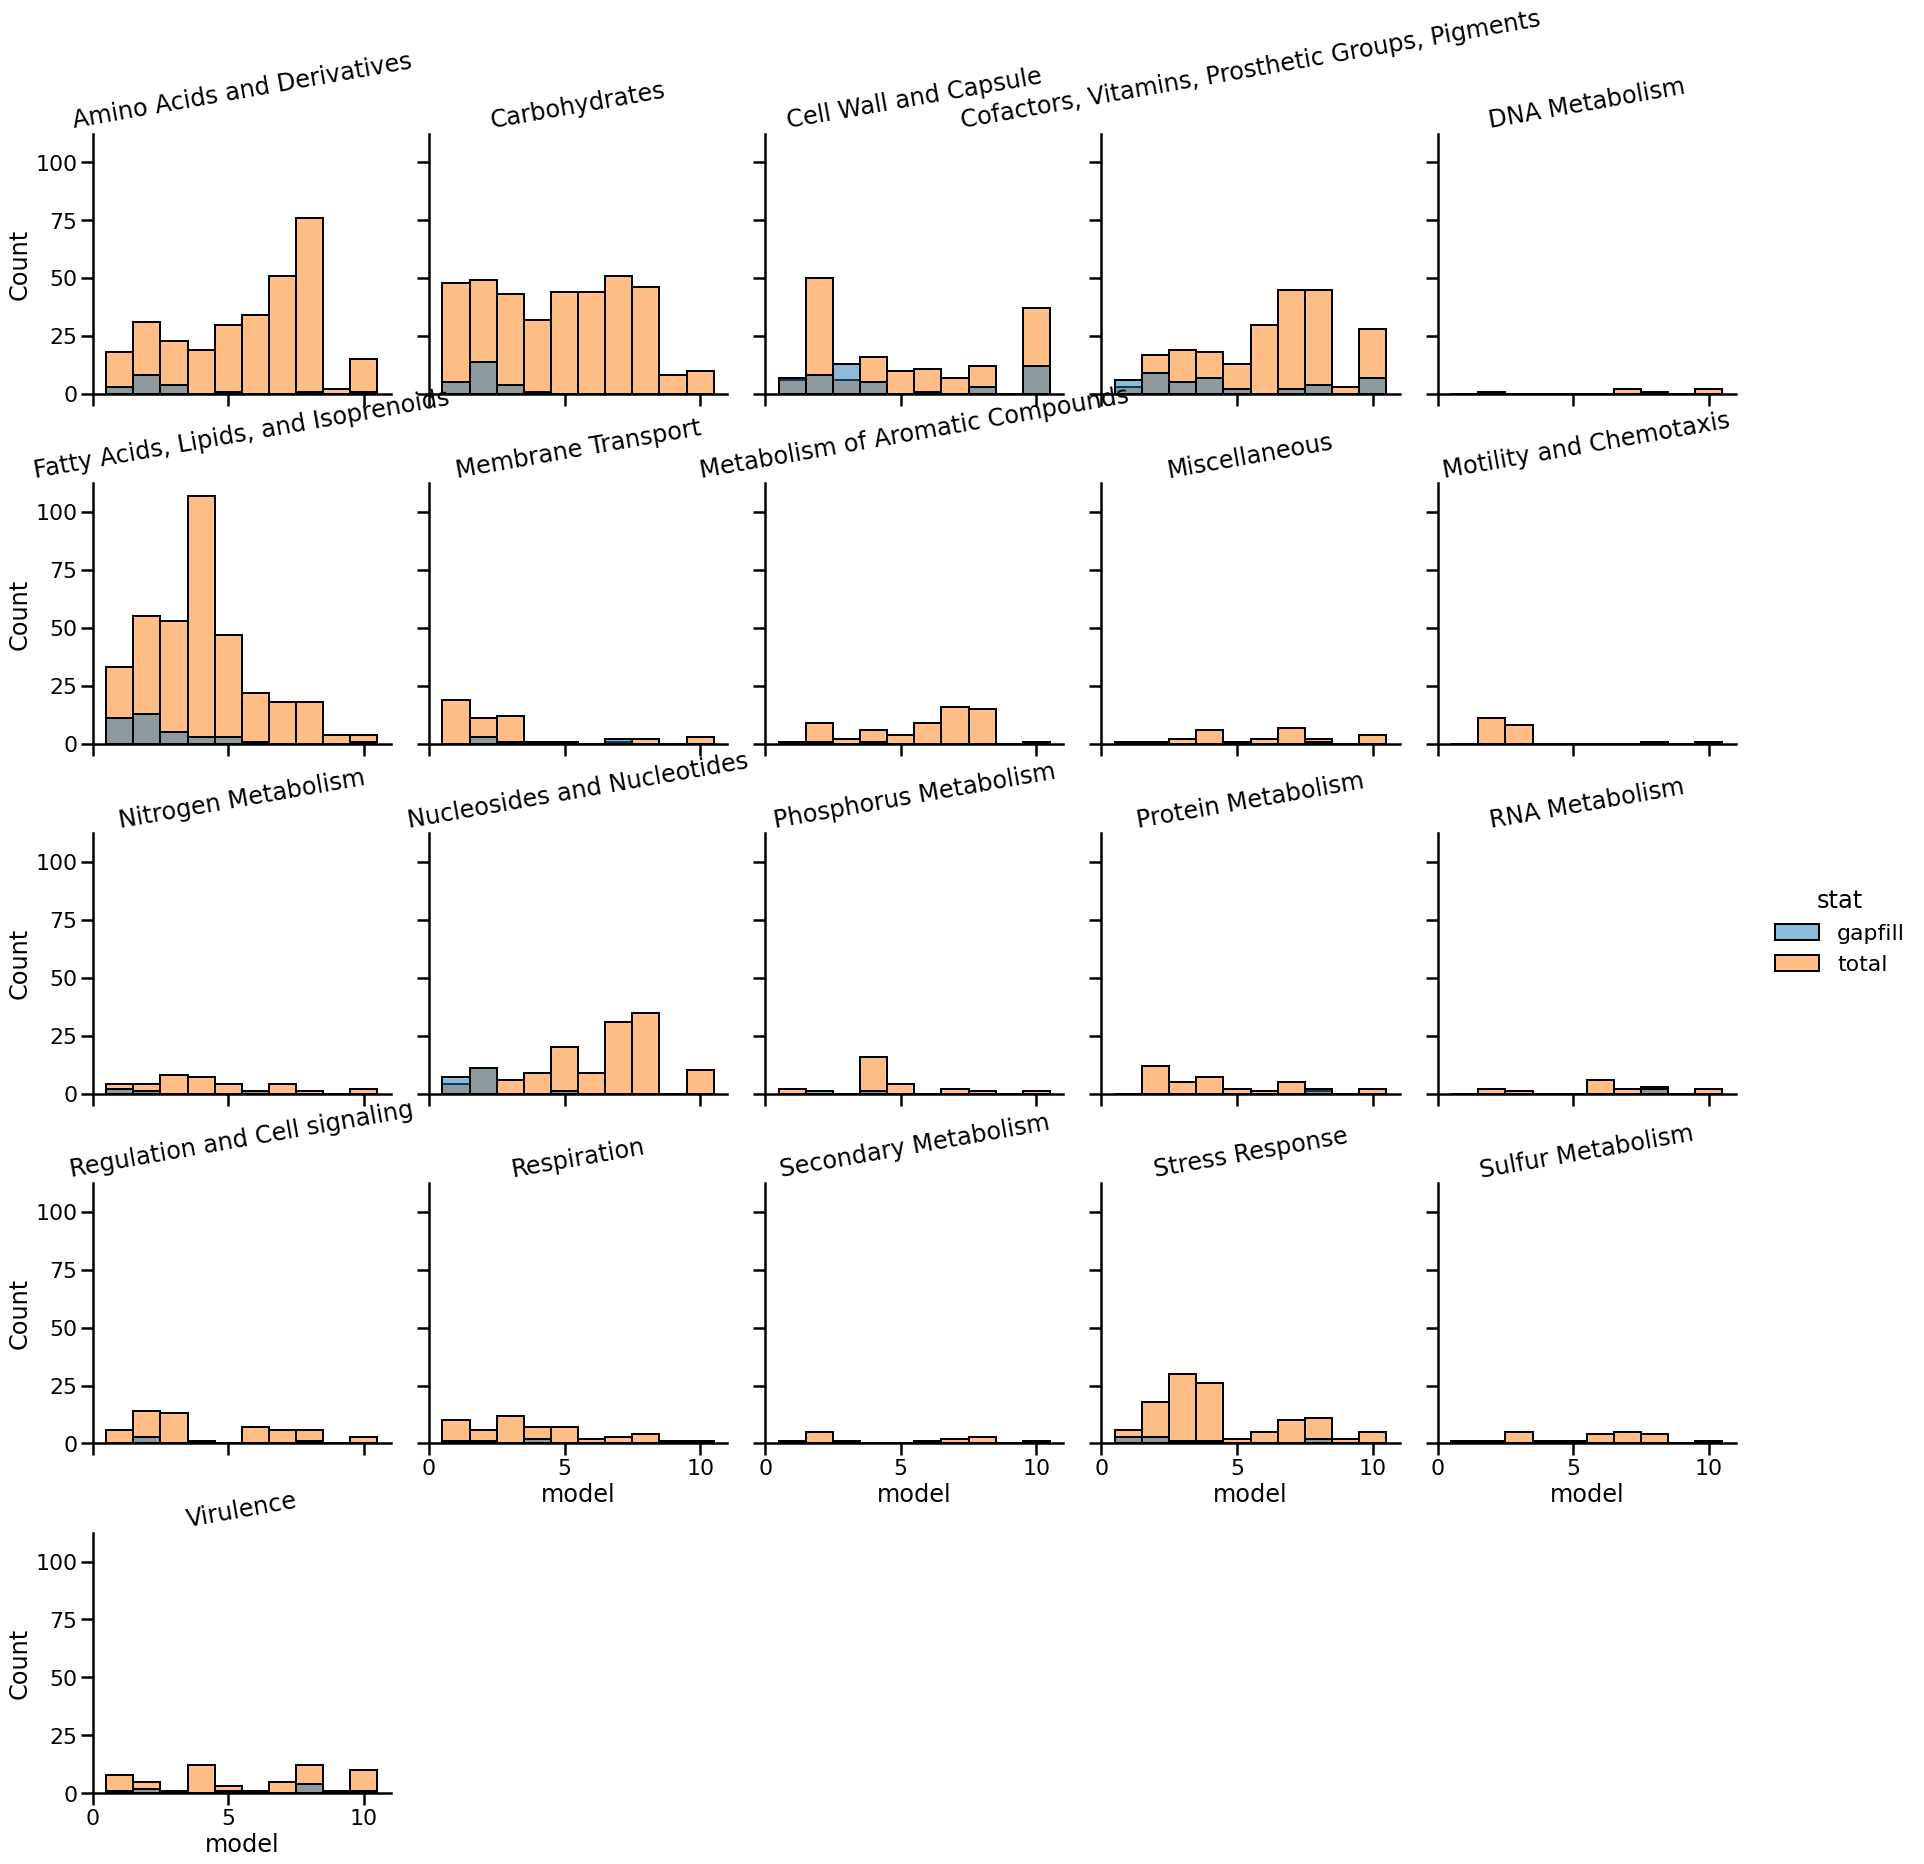

In [40]:
sns.set_context('poster')
sns.displot(data=total_models_per_reaction, x='model', 
            #fill=False, cumulative=True,
            kind='hist', col='Class', col_wrap=5, hue='stat', discrete=True,
            hue_order= ['gapfill', 'total', ],
           ).set_titles(col_template='{col_name}', rotation=10)
plt.show()

In [41]:
total_models_per_reaction

,index,Class,Reaction,model,stat
0,0,Amino Acids and Derivatives,rxn00011,7,total
1,1,Amino Acids and Derivatives,rxn00085,10,total
2,2,Amino Acids and Derivatives,rxn00126,8,total
3,3,Amino Acids and Derivatives,rxn00141,10,total
4,4,Amino Acids and Derivatives,rxn00143,7,total
...,...,...,...,...,...
2378,240,Virulence,rxn10199,8,gapfill
2379,241,Virulence,rxn10481,9,gapfill
2380,242,Virulence,rxn13782,8,gapfill
2381,243,Virulence,rxn13783,8,gapfill
